# <span style="color:green"> Numerical Simulation Laboratory </span>
## <span style="color:brown"> Python Exercise 12 </span>
## <span style="color:orange"> Keras - Deep & Convolutional Neural Network image recognition </span>

In [23]:
import tensorflow as tf
from tensorflow import keras
import os #interazione con sistema operativo della macchina
import numpy as np
import matplotlib.pyplot as plt

In [24]:
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

### Esercizio 12.01

L'esercizio richiede di sviluppare una Deep Neural Network (DNN) per risolvere un problema di classificazione. Le DNN sono una classe di reti neurali artificiali caratterizzate da una grande profondità, ovvero da molti strati nascosti. Questi strati permettono di apprendere rappresentazioni gerarchiche complesse dei dati in ingresso. L'obiettivo dell'esercitazione è classificare cifre scritte a mano prese dal database MNIST. Il database MNIST contiene 60.000 immagini di addestramento e 10.000 immagini di test, ciascuna di dimensione 28×28 pixel, che rappresentano le cifre da 0 a 9. Ho sviluppato tre DNN distinte, ciascuna ottimizzata con un differente ottimizzatore: Stochastic Gradient Descent (SGD), Adam e RMSprop. Ciascuna rete è progettata con più strati densi (fully connected layers) e funzioni di attivazione ReLU. La struttura della rete comprende un livello di input con 400 neuroni, corrispondente ai pixel dell'immagine 28×28. Seguono un livello denso con 400 neuroni e attivazione ReLU, un altro livello denso con 100 neuroni e attivazione ReLU, e un livello di dropout con un tasso di 0.6 per prevenire l'overfitting. Infine, il livello di output è composto da 10 neuroni, ciascuno corrispondente a una delle cifre da classificare, e utilizza la funzione di attivazione softmax per produrre le probabilità di appartenenza alle classi.

In [25]:
from keras.datasets import mnist #importo i dati

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels: immagini 28x28
# output
num_classes = 10 # 10 digits: numero delle classi da predirre

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print('X_test shape:', X_test.shape)
print('Y_test shape:', Y_test.shape)

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)
X_test shape: (10000, 28, 28)
Y_test shape: (10000,)


In [26]:
# Consider an array of 5 labels out of a set of 3 classes {0, 1, 2}:
#labels = np.array([0, 2, 1, 2, 0])
# `to_categorical` converts this into a matrix with as many columns as there are classes.
# The number of rows stays the same.
#keras.utils.to_categorical(labels)

In [27]:
# Reshape: rendo vettori 1D le matrici 2D di immagini
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print()

# cast to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

X_train shape: (60000, 784)
X_test shape: (10000, 784)



an example of a data point with label 3


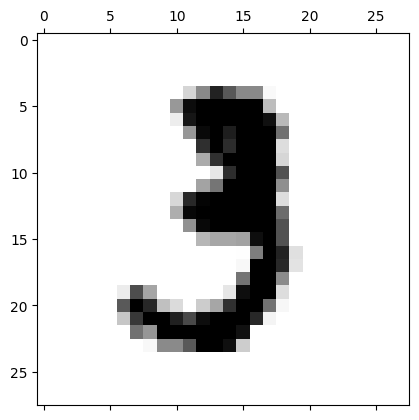

... and with label [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.] after to_categorical

X_train shape: (60000, 784)
Y_train shape: (60000, 10)


In [28]:
# look at an example of data point
print('an example of a data point with label', Y_train[10])
# matshow: display a matrix in a new figure window
plt.matshow(X_train[10,:].reshape(28,28),cmap='binary')
plt.show()

# convert class vectors to binary class matrices, e.g. for use with categorical_crossentropy
Y_train = keras.utils.to_categorical(Y_train, num_classes) #ogni etichetta viene trasformata in un vettore della lunghezza del numero di classi (num_classes), dove tutti gli elementi sono 0 tranne quello corrispondente alla classe della etichetta, che è 1.
Y_test = keras.utils.to_categorical(Y_test, num_classes)
print('... and with label', Y_train[10], 'after to_categorical')
print()
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)

In [45]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.6))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax')) #softmax rende il vettore probabilità (per i problemi di classificazione)
    
    return model

print('Model architecture created successfully!')

Model architecture created successfully!


In [46]:
from keras.optimizers import SGD, Adam, RMSprop

def compile_model():
    # create the model
    model_sgd=create_DNN()
    # compile the model
    model_sgd.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=SGD(),
                  metrics=['acc'])
    return model_sgd

def compile_model():
    # create the model
    model_adamo=create_DNN()
    # compile the model
    model_adamo.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=Adam(),
                  metrics=['acc'])
    return model_adamo

def compile_model():
    # create the model
    model_rms=create_DNN()
    # compile the model
    model_rms.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=RMSprop(),
                  metrics=['acc'])
    return model_rms

print('Models compiled successfully and ready to be trained.')

Models compiled successfully and ready to be trained.


In [47]:
# training parameters
batch_size = 32 #le 60k immagini verranno divisi in gruppi da 32 sui quali verranno calcolati i gradienti: i gradienti saranno quindi molto rumorosi
epochs = 10

# create the deep neural network
model_sgd = compile_model()
model_adamo = compile_model()
model_rms = compile_model()

# train DNN and store training info in history
history_sgd = model_sgd.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, Y_test), verbose=0)

history_adamo = model_adamo.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, Y_test), verbose=0)

history_rms = model_rms.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, Y_test), verbose=0)

In [48]:
# Evaluate and print performance for each model
def evaluate_and_print_performance(model, X_test, Y_test, name):
    score = model.evaluate(X_test, Y_test, verbose=1)
    print(f'\n{name} Test loss:', score[0])
    print(f'{name} Test accuracy:', score[1])

# Plot training history for accuracy and loss
def plot_training_history(history, name):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Summarize history for accuracy
    ax1.plot(history.history['acc'])
    ax1.plot(history.history['val_acc'])
    ax1.set_title(f'{name} Model Accuracy')
    ax1.set_ylabel('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.legend(['Train', 'Validation'], loc='best')

    # Summarize history for loss
    ax2.plot(history.history['loss'])
    ax2.plot(history.history['val_loss'])
    ax2.set_title(f'{name} Model Loss')
    ax2.set_ylabel('Loss')
    ax2.set_xlabel('Epoch')
    ax2.legend(['Train', 'Validation'], loc='best')

    plt.tight_layout()
    plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - acc: 0.9736 - loss: 0.2424

SGD Test loss: 0.20389075577259064
SGD Test accuracy: 0.9775000214576721
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9727 - loss: 0.2258

Adam Test loss: 0.19310623407363892
Adam Test accuracy: 0.9763000011444092
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - acc: 0.9709 - loss: 0.2089

RMSprop Test loss: 0.17737868428230286
RMSprop Test accuracy: 0.9757999777793884


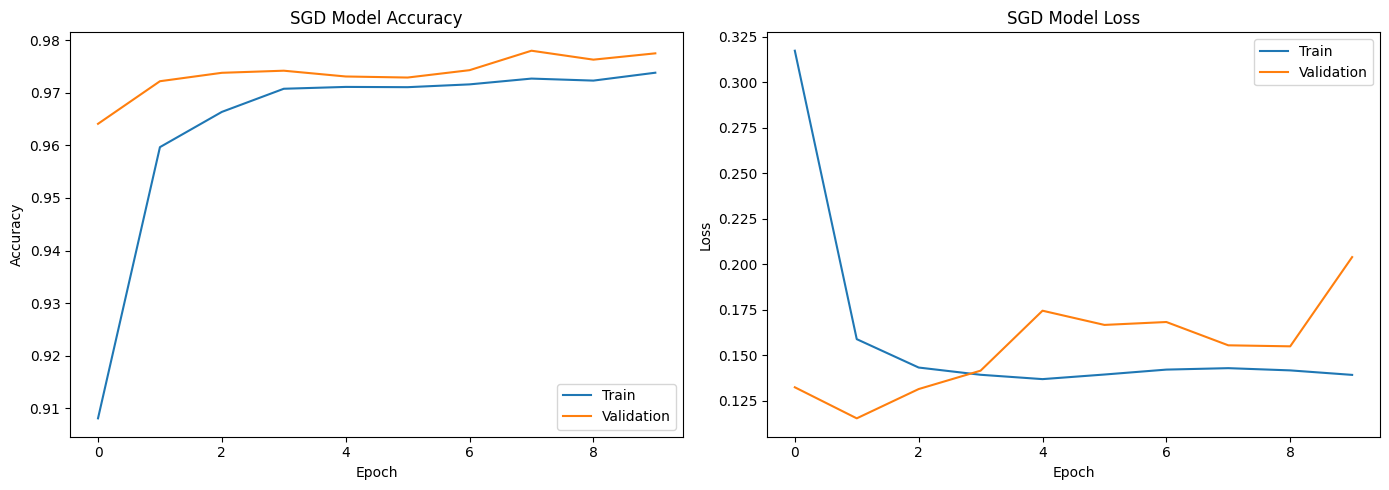

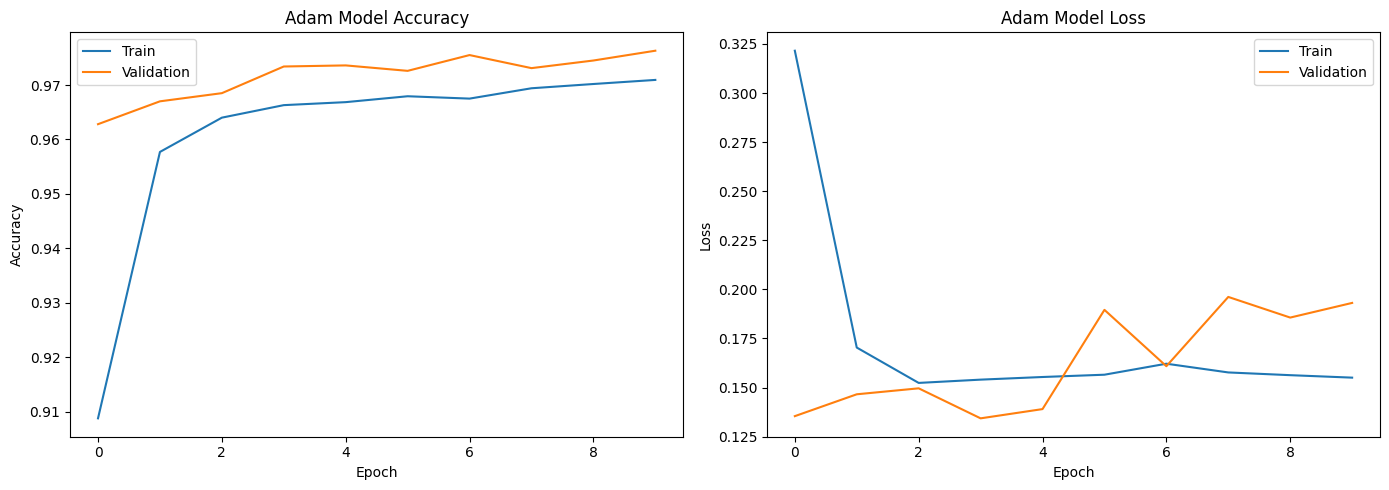

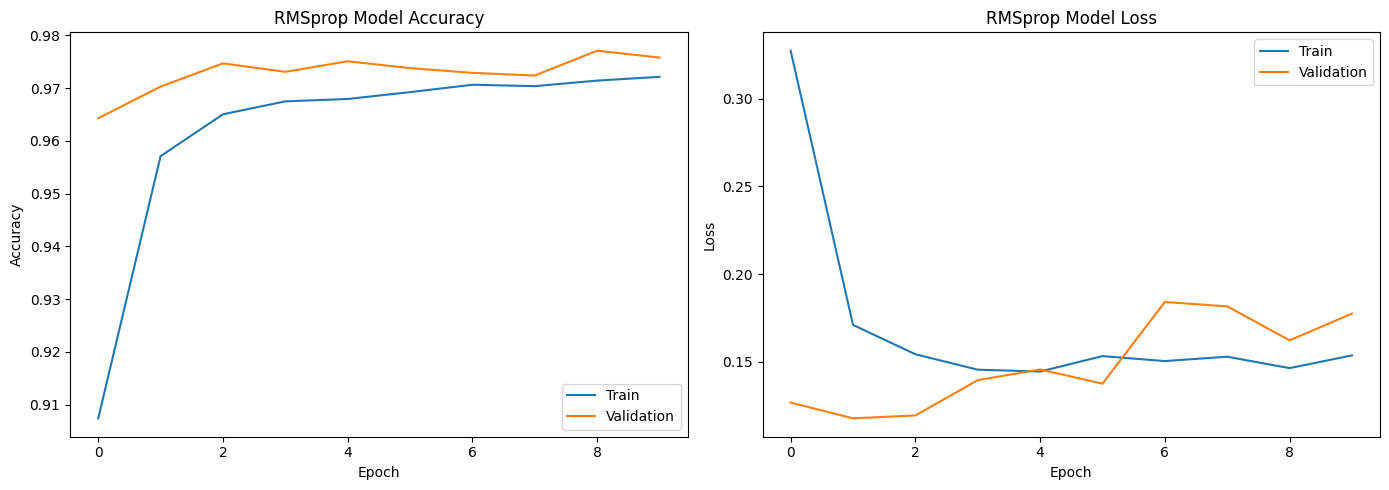

In [49]:
# Evaluate and print performance for each model
evaluate_and_print_performance(model_sgd, X_test, Y_test, 'SGD')
evaluate_and_print_performance(model_adamo, X_test, Y_test, 'Adam')
evaluate_and_print_performance(model_rms, X_test, Y_test, 'RMSprop')

# Plot training history for each model
plot_training_history(history_sgd, 'SGD')
plot_training_history(history_adamo, 'Adam')
plot_training_history(history_rms, 'RMSprop')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


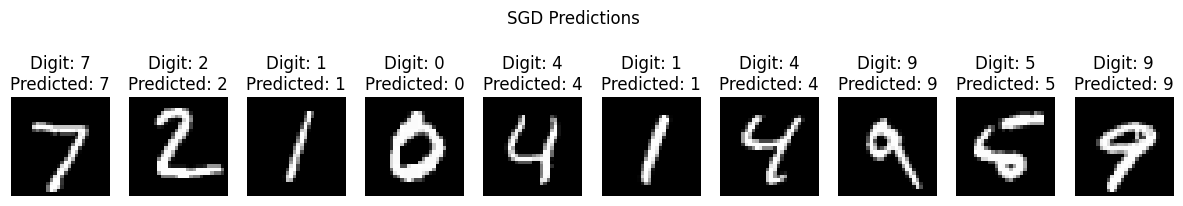

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


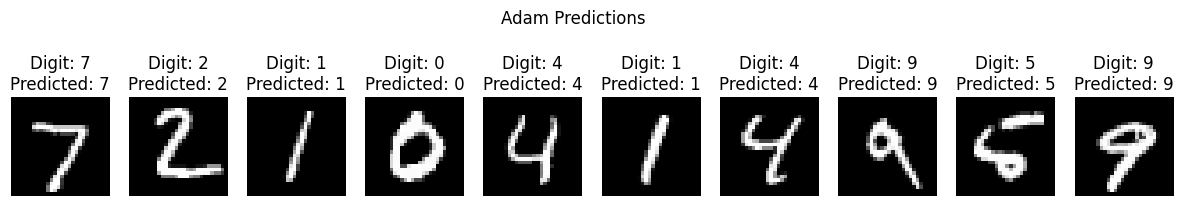

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


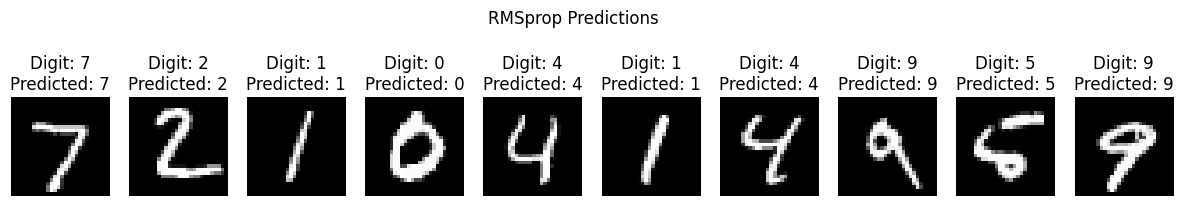

In [50]:
# Function to make predictions and plot results
def predict_and_plot(model, X_test, Y_test, name):
    X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)
    predictions = model.predict(X_test)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    
    plt.figure(figsize=(15, 5)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off')
    plt.suptitle(f'{name} Predictions')
    plt.show()

# Assuming X_test is already in the correct shape
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)

# Make predictions and plot results for each model
predict_and_plot(model_sgd, X_test, Y_test, 'SGD')
predict_and_plot(model_adamo, X_test, Y_test, 'Adam')
predict_and_plot(model_rms, X_test, Y_test, 'RMSprop')

Tutti i modelli hanno previsto correttamente le cifre.

#### Conclusioni

I tre modelli hanno prestazioni simili, con un'accuracy sul set di validazione dell'ordine del 97% (in tutti i casi, l'accuracy valutata sul test di validazione è maggiore di quella calcolata sul set di allenamento, avendo impostato un Dropout con rate 0.6).

L'andamento della loss function sul validation set all'avanzare delle epoche mi sembra tuttavia anomalo: parte da un ottimo valore e prosegue con un andamento rumoroso e leggermente crescente. Tuttavia, poichè l'accuracy è ottima e stazionaria a partire dalla seconda/terza epoca, le predizioni sono corrette ed il valore finale di loss è comunque basso (circa 0.2 in tutti i casi), credo di poter considerare tale andamento come delle fluttuazioni (non ampie). In tutti e tre i modelli, la convergenza è quindi raggiunta entro la quinta epoca.

### Esercizio 12.2

L'esercizio richiede di sviluppare una Convolutional Neural Network (CNN) per risolvere lo stesso problema di classificazione. Questo approccio è mirato a sfruttare le correlazioni spaziali locali tra i pixel presenti nelle immagini. Inoltre, la CNN beneficia dell'invarianza alla traslazione, il che significa che il modello sarà in grado di riconoscere le cifre indipendentemente dalla loro posizione precisa nell'immagine.

In [54]:
# for Convolutional Neural Networks
from keras.layers import Flatten, Conv2D, MaxPooling2D

# reshape data, depending on Keras backend
if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [56]:
def create_CNN(input_shape, num_classes=10):
    # instantiate model
    model = Sequential()  
    # add first convolutional layer with 10 filters
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))  
    # add second convolutional layer with 20 filters
    model.add(Conv2D(20, kernel_size=(5, 5), activation='relu'))   
    # add a max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    # add dropout layer
    model.add(Dropout(0.25))  
    # add third convolutional layer with 50 filters
    model.add(Conv2D(50, kernel_size=(3, 3), activation='relu'))  
    # add a second max pooling layer
    model.add(MaxPooling2D(pool_size=(2, 2)))  
    # add another dropout layer
    model.add(Dropout(0.25))   
    # flatten the output of the convolutional layers to feed into the dense layers
    model.add(Flatten())  
    # add a dense all-to-all relu layer with 128 units
    model.add(Dense(128, activation='relu'))  
    # add another dropout layer
    model.add(Dropout(0.5))  
    # add the final dense layer with softmax activation
    model.add(Dense(num_classes, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='SGD',
                  metrics=['acc'])
    
    return model


input_shape = (28, 28, 1) 
num_classes = 10
model_CNN = create_CNN(input_shape, num_classes)
print('Model architecture created successfully!')

Model architecture created successfully!


In [57]:
# training parameters
batch_size = 32
epochs = 10

# train CNN
hystory_CNN = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=(X_test, Y_test))

# evaliate model
score = model_CNN.evaluate(X_test, Y_test, verbose=0)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.033569999039173126
Test accuracy: 0.9890999794006348


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - acc: 0.9869 - loss: 0.0401

CNN Test loss: 0.033569999039173126
CNN Test accuracy: 0.9890999794006348


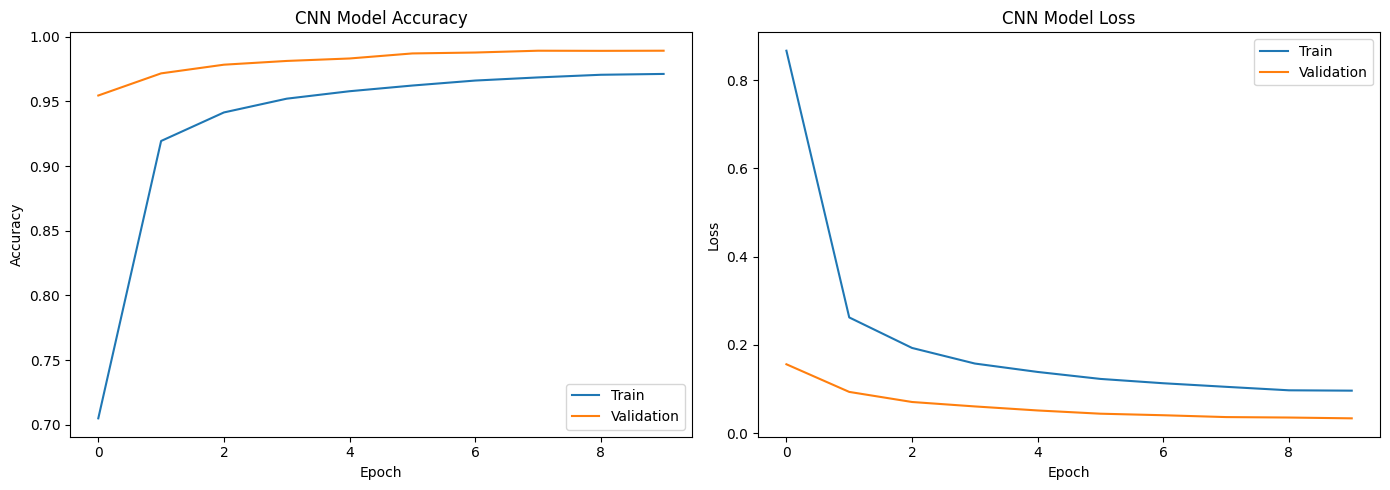

In [58]:
evaluate_and_print_performance(model_CNN, X_test, Y_test, 'CNN')

# Plot training history for each model
plot_training_history(hystory_CNN, 'CNN')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


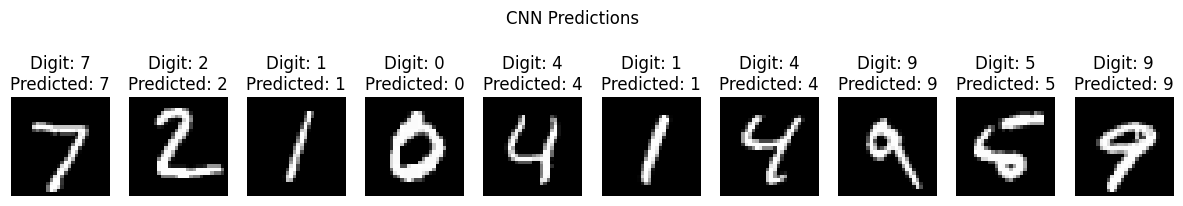

In [59]:
def predict_and_plot(model, X_test, Y_test, name):
    # Prevedi i risultati
    predictions = model.predict(X_test)
    
    # Visualizza i risultati
    plt.figure(figsize=(15, 5)) 
    for i in range(10):    
        ax = plt.subplot(2, 10, i + 1)    
        plt.imshow(X_test[i, :, :, 0], cmap='gray')    
        plt.title("Digit: {}\nPredicted: {}".format(np.argmax(Y_test[i]), np.argmax(predictions[i])))    
        plt.axis('off')
    plt.suptitle(f'{name} Predictions')
    plt.show()

# Make predictions and plot results for each model
predict_and_plot(model_CNN, X_test, Y_test, 'CNN')

Tutte le previsioni sono corrette.

Il modello ha un'accuracy del 99% ed una loss pari a 0.03.

### Esercizio 12.3

L'esercizio richiede di testare la CNN su numeri scritti a mano non appartenenti al Database MNIST.

In [60]:
from PIL import Image
import os

#### CNN

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


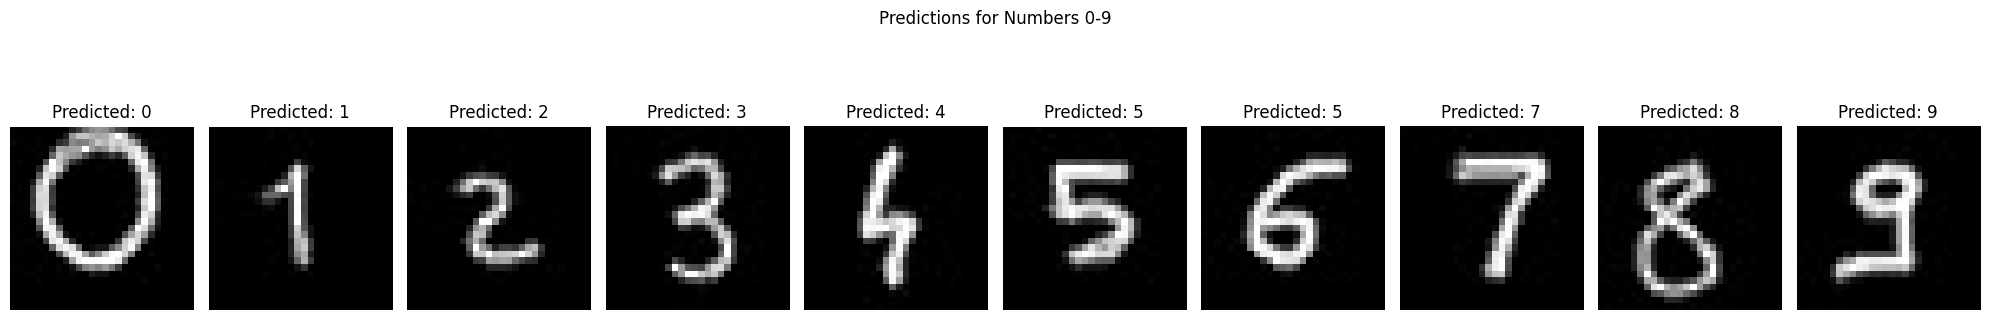

In [61]:
# Crea una figura matplotlib di dimensioni adeguate
plt.figure(figsize=(20, 4))

# Itera su tutte le immagini da 0 a 9
for i in range(10):
    digit_filename = f"./handwritten_numbers/{i}.jpeg"
    
    # Preprocessa l'immagine
    digit_in = Image.open(digit_filename).convert('L')
    digit_in = digit_in.resize((28, 28))
    data = np.array(digit_in)
    data = data / 255.0
    data = data.reshape(1, 28, 28, 1)
    
    # Prevedi il numero
    prediction = model_CNN.predict(data)
    predicted_digit = np.argmax(prediction)
    
    # Mostra l'immagine e la previsione come subplot
    plt.subplot(1, 10, i + 1)
    plt.imshow(data[0, :, :, 0], cmap='gray')
    plt.title(f'Predicted: {predicted_digit}')
    plt.axis('off')

# Mostra la figura completa con tutte le immagini
plt.suptitle('Predictions for Numbers 0-9')
plt.tight_layout()
plt.show()


La rete prevede correttuamente tutti i numeri eccetto il 6.